# **Task 2: Credit Risk Prediction**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Practice Datasets/Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
print("Loan Prediction Data Shape:", df.shape)
df.describe()

Loan Prediction Data Shape: (614, 13)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Data Cleaning and Validation**

**Handling Missing Values**

In [29]:
# Identify columns with missing data
missing_columns = df.columns[df.isnull().any()]

print("Columns with missing data:", missing_columns.tolist())

# To check the count of missing values in each column
print(df.isnull().sum())

Columns with missing data: ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [30]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Fill numeric columns with median (avoids skewing data)
        df[col].fillna(df[col].median(), inplace=True)
    else:
        # Fill categorical columns with mode (most frequent value)
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-30-560020361.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-30-560020361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [31]:
# Identify columns with missing data
missing_columns = df.columns[df.isnull().any()]

print("Columns with missing data:", missing_columns.tolist())

# To check the count of missing values in each column
print(df.isnull().sum())

Columns with missing data: []
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**Duplicate Values**

In [32]:
# Count duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Display duplicate rows
df[df.duplicated()]

Duplicate Rows: 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


**Unique Count**

In [33]:
# Check unique value counts for all columns
for col in df.columns:
    print(f"\n--- Column: {col} ---")
    print(f"Number of unique values: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False))  # include NaN as a value


--- Column: Loan_ID ---
Number of unique values: 614
Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

--- Column: Gender ---
Number of unique values: 2
Gender
Male      502
Female    112
Name: count, dtype: int64

--- Column: Married ---
Number of unique values: 2
Married
Yes    401
No     213
Name: count, dtype: int64

--- Column: Dependents ---
Number of unique values: 4
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

--- Column: Education ---
Number of unique values: 2
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

--- Column: Self_Employed ---
Number of unique values: 2
Self_Employed
No     532
Yes     82
Name: count, dtype: int64

--- Column: ApplicantIncome ---
Number of unique values: 505
ApplicantIncome
2500     9
4583     6
6000     6
2600     6
5000     5
        ..

**Handling Outliers**

In [34]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")
    if len(outliers) > 0:
        print(f"   Outlier Range: < {lower_bound:.2f} or > {upper_bound:.2f}")

ApplicantIncome: 50 outliers
   Outlier Range: < -1498.75 or > 10171.25
CoapplicantIncome: 18 outliers
   Outlier Range: < -3445.88 or > 5743.12
LoanAmount: 41 outliers
   Outlier Range: < 3.50 or > 261.50
Loan_Amount_Term: 88 outliers
   Outlier Range: < 360.00 or > 360.00
Credit_History: 89 outliers
   Outlier Range: < 1.00 or > 1.00


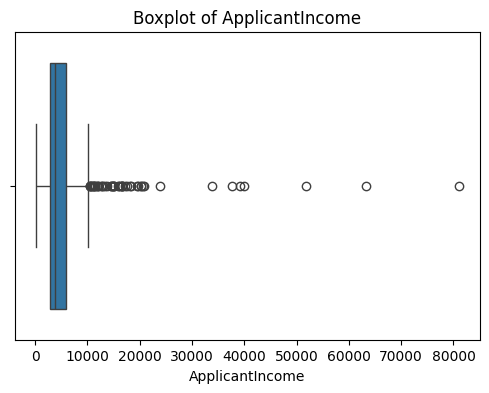

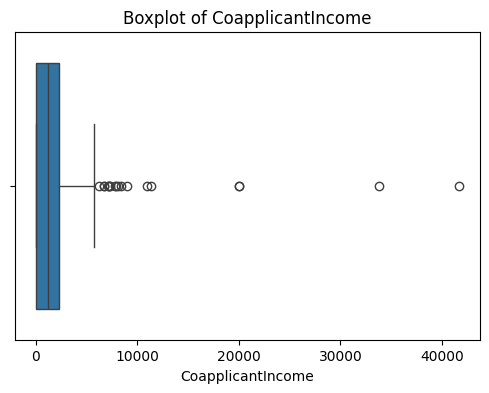

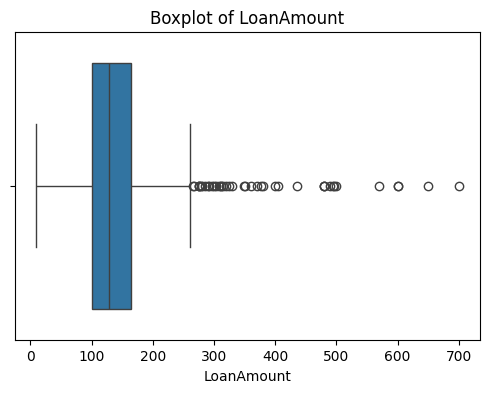

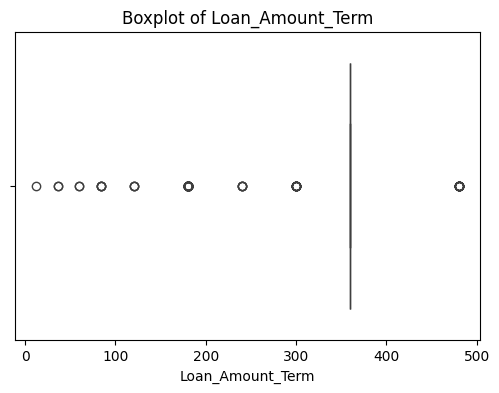

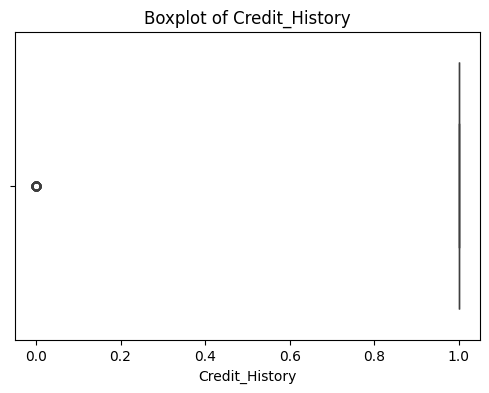

In [35]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**Encoding Data (Label and One Hot)**

In [36]:
# Drop Loan_ID (not useful)
df.drop('Loan_ID', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
# Binary categorical features (Label Encoding)
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-Hot Encoding for multi-category variables
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

In [37]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,False,False,True


**Visualizing Class Distributions**

/tmp/ipython-input-38-73652342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='Set2')


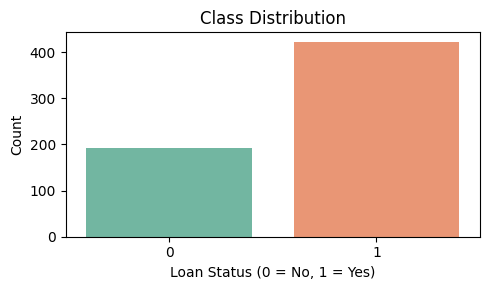

In [38]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Loan_Status', palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Loan Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [39]:
corr_matrix = df.corr()
fdw_corr = corr_matrix['Loan_Status']
corr = fdw_corr.sort_values(ascending=False)
print(corr)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married                    0.091478
Dependents_2               0.062384
Gender                     0.017987
Self_Employed             -0.003700
ApplicantIncome           -0.004710
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education                 -0.085884
Name: Loan_Status, dtype: float64


<Axes: >

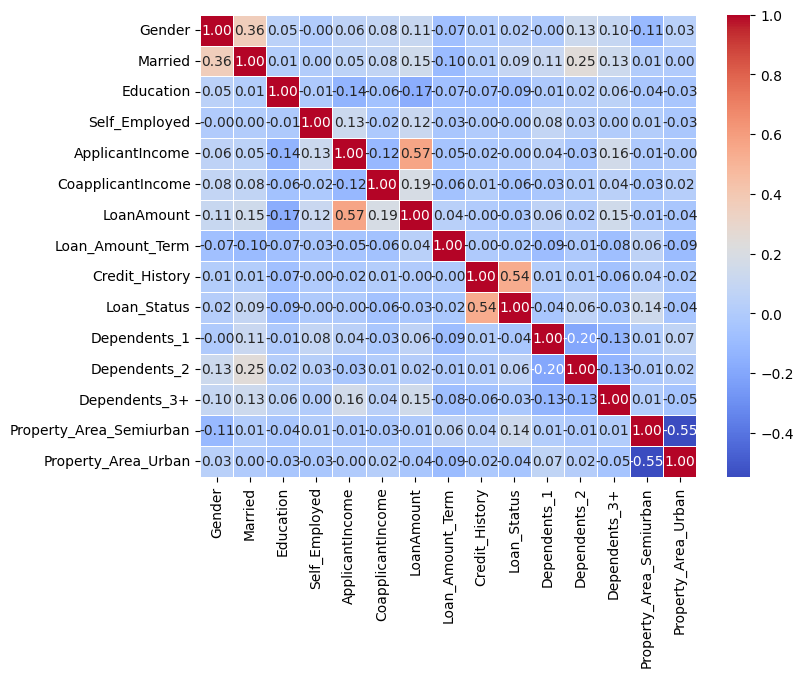

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=False)

**Visualize Feature Distributions**

Plotting: Gender


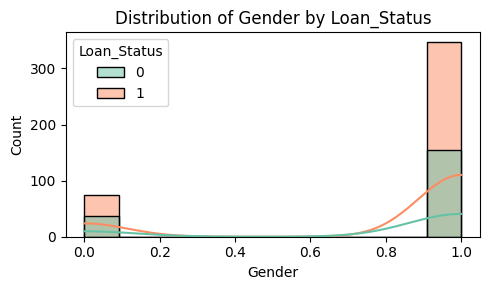

Plotting: Married


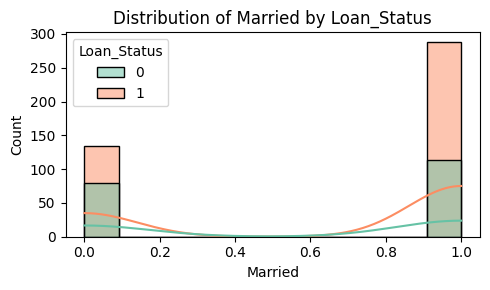

Plotting: Education


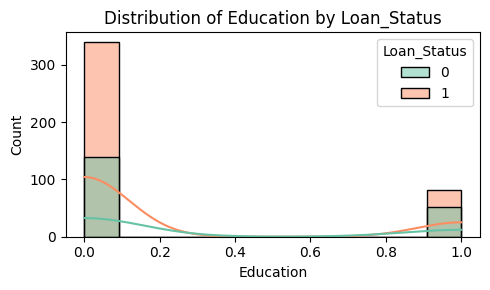

Plotting: Self_Employed


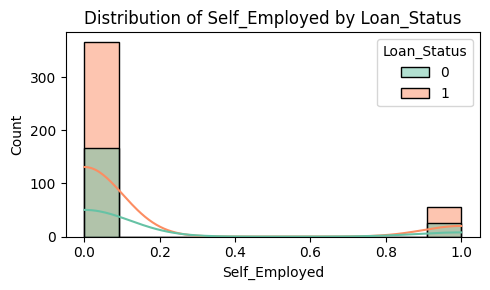

Plotting: ApplicantIncome


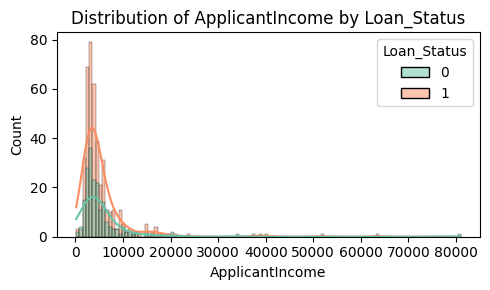

Plotting: CoapplicantIncome


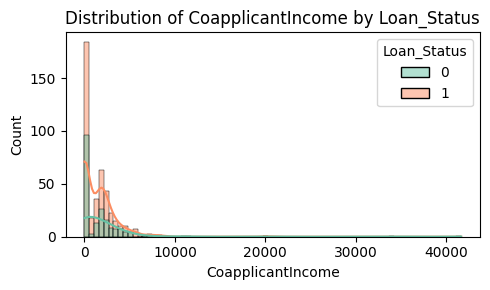

Plotting: LoanAmount


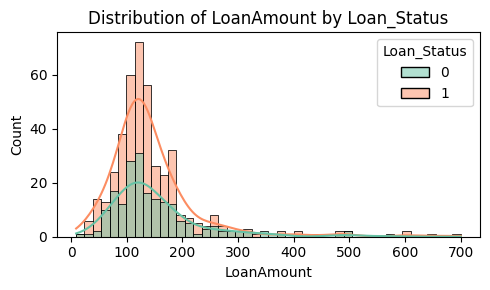

Plotting: Loan_Amount_Term


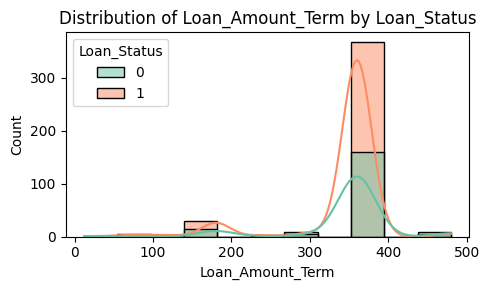

Plotting: Credit_History


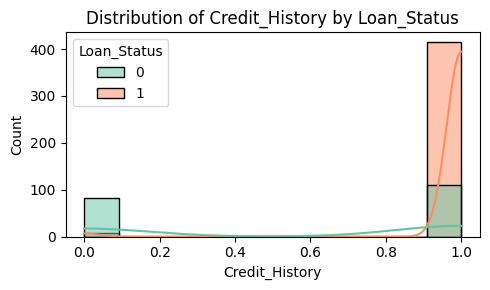

Plotting: Dependents_1


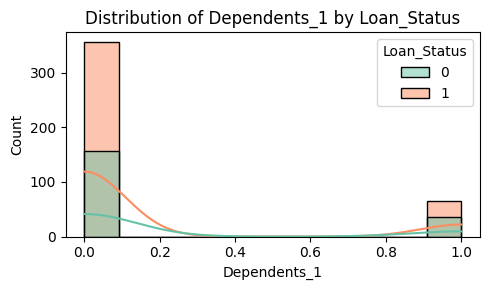

Plotting: Dependents_2


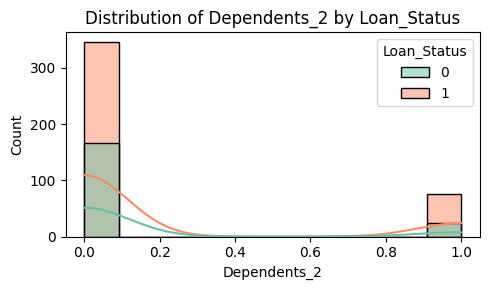

Plotting: Dependents_3+


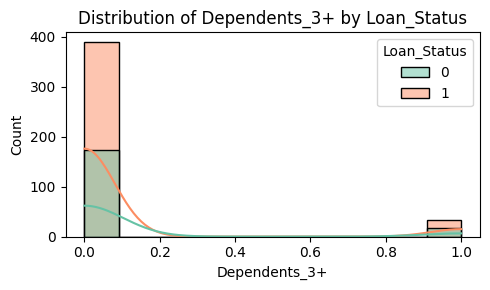

Plotting: Property_Area_Semiurban


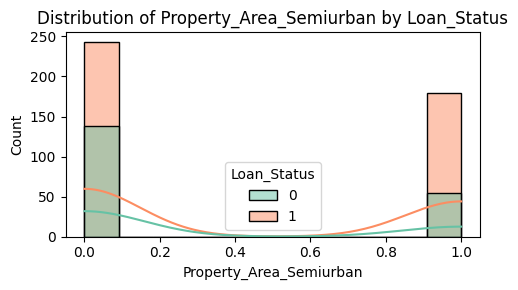

Plotting: Property_Area_Urban


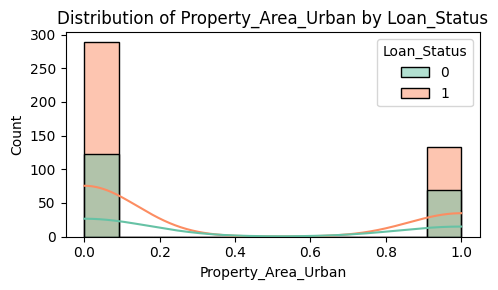

In [41]:
feature_columns = [col for col in df.columns if col != 'Loan_Status']
for feature in feature_columns:
    print(f"Plotting: {feature}")
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=feature, hue='Loan_Status', kde=True, palette='Set2')
    plt.title(f'Distribution of {feature} by Loan_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


# **Training Model and Evaluating Performance**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

**Splitting the Data**

In [46]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

**Training Models**

In [47]:
# Logistic Regression
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, Y_train)
log_preds = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, Y_train)
tree_preds = tree_model.predict(X_test)

**Evaluating Models**

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73        48
           1       0.84      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.79      0.82       154
weighted avg       0.88      0.86      0.85       154

Accuracy for Logistic Regression: 0.8636
Classification Report for Decision Trees:
              precision    recall  f1-score   support

           0       0.84      0.56      0.68        48
           1       0.83      0.95      0.89       106

    accuracy                           0.83       154
   macro avg       0.84      0.76      0.78       154
weighted avg       0.83      0.83      0.82       154

Accuracy for Decsion Tree: 0.8312


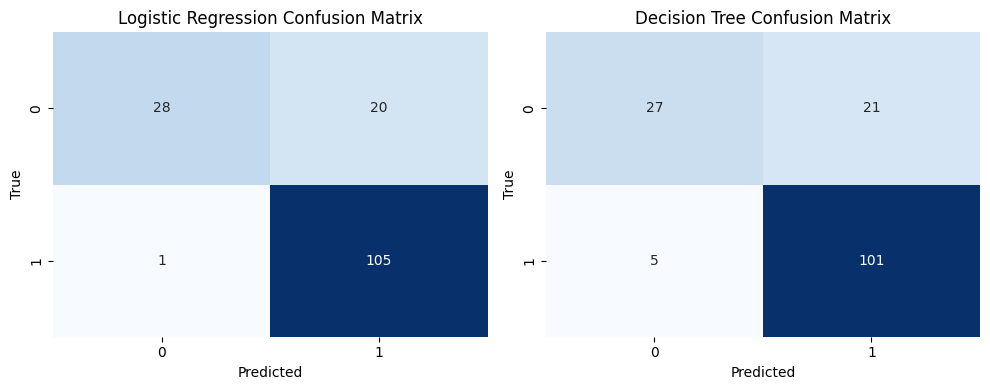

In [49]:
# Evaluate performance for LG
print("Classification Report for Logistic Regression:")
print(classification_report(Y_test, log_preds))
accuracy_original = accuracy_score(Y_test, log_preds)
print(f"Accuracy for Logistic Regression: {accuracy_original:.4f}")

# Evaluate performance for DT
print("Classification Report for Decision Trees:")
print(classification_report(Y_test, tree_preds))
accuracy_original = accuracy_score(Y_test, tree_preds)
print(f"Accuracy for Decsion Tree: {accuracy_original:.4f}")


models = {
    "Logistic Regression": log_preds,
    "Decision Tree": tree_preds
}

# True labels
true_labels = Y_test

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns for 2 models

for ax, (name, preds) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

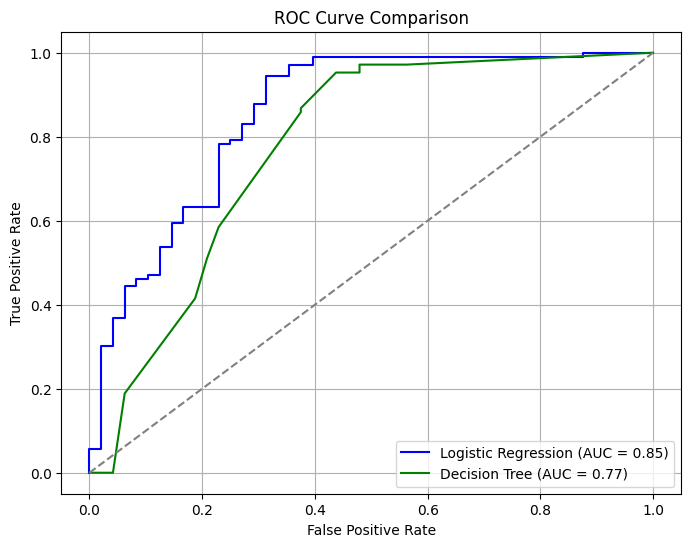

Logistic Regression AUC: 0.8548
Decision Tree AUC: 0.7749


In [56]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (for ROC)
log_probs = log_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
tree_probs = tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr_log, tpr_log, _ = roc_curve(Y_test, log_probs)
fpr_tree, tpr_tree, _ = roc_curve(Y_test, tree_probs)

# Calculate AUC
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='green')

# Random guessing line
plt.plot([0,1], [0,1], linestyle='--', color='gray')

# Labels and Title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC scores
print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Decision Tree AUC: {auc_tree:.4f}")
